In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

This is a template for your final project. 

In [2]:
full_dataset = pd.read_csv('IMDb movies.csv')
full_dataset.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0


In [3]:
full_dataset.shape

(60198, 22)

### Part 1.

Task formalization and Evaluation criteria

1.1 Select your target variable, explain your choice. Separate target variable from the feature matrix.

In order to measure the success of a movie, things that come to mind are the monetary value or the movie rating. Candidates for target values are worldwide_gross_income, avg_vote. We begin explore the distribution of the candidates of the target variable. 

# Explore Worldwide_gross_income

In [4]:
full_dataset['worlwide_gross_income'].isnull().sum()

41062

In [5]:
41062/60198

0.6821156849064753

Approximately 68% of the variable is missing, so we cannot use this variable as the target variable.

# Explore Avg_vote

In [6]:
full_dataset['avg_vote'].isnull().sum()

0

In [7]:
full_dataset['avg_vote'].value_counts()

6.4     2460
6.7     2434
6.5     2426
6.6     2421
6.8     2397
        ... 
9.5        2
9.3        1
10.0       1
9.7        1
9.6        1
Name: avg_vote, Length: 89, dtype: int64

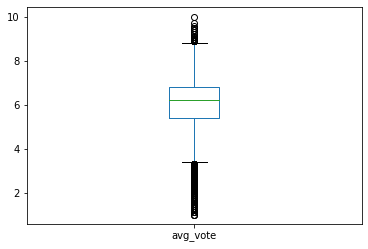

In [8]:
full_dataset['avg_vote'].plot(kind = 'box');

In [9]:
full_dataset['avg_vote'].mean()

5.997348749127767

We can make $6$ as the breaking point where any avg_vote above $6$ is successful, anything below that is not sccucessful.

In [10]:
full_dataset['success'] = np.where(full_dataset['avg_vote'] >= 6, 1, 0)
full_dataset.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,success
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0,1
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0,0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0,0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0,1
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0,0


In [11]:
#We drop avg_vote
full_dataset.drop(columns = ['avg_vote'], inplace = True)
full_dataset.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,success
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,537,$ 2250,NaN,NaN,NaN,7.0,7.0,1
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,171,NaN,NaN,NaN,NaN,4.0,2.0,0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,420,$ 45000,NaN,NaN,NaN,24.0,3.0,0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,2019,NaN,NaN,NaN,NaN,28.0,14.0,1
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",438,NaN,NaN,NaN,NaN,12.0,5.0,0


# Explore target variable success

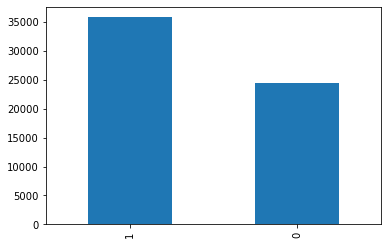

In [12]:
full_dataset['success'].value_counts().plot(kind = 'bar');

In [13]:
y = full_dataset['success']
X = full_dataset.drop('success', axis = 1)

1.2 Explain which task are you going to solve (is it a regression, classification or something else)? 

This is a classification problem as we want to predict whether a movie is successful. Here, we want to assign a class label to identity whether movie is successful or not.

1.3 Select a metric. Is it already implemented in sklearn? If yes, import it. If not, it is time to write a function which will calculate it. 

We choose f1 score to be the metric, as this metric combines precision and recall. It is implemented in sklearn.

### Part 2.

Explore and preprocess the data

2.1 Split data into train and test

We can use this function below to drop rows with too many missing values from the dataset. We remove rows that have more than 50% missing values.

In [14]:
def drop_uninformative_objects(X, y):
    # your code here
    length = X.shape[0]
    row = X.shape[1]
    
    X_subset = X[X.isnull().sum(axis = 1)/row <= 0.5]
    y_subset = y[X.isnull().sum(axis = 1)/row <= 0.5]
    
    return X_subset, y_subset

In [15]:
X, y = drop_uninformative_objects(X, y)

In [16]:
X.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                      5
language                   439
director                    24
writer                     808
production_company        2744
actors                      30
description               1993
votes                        0
budget                   43379
usa_gross_income         48306
worlwide_gross_income    41062
metascore                51386
reviews_from_users        4069
reviews_from_critics      8229
dtype: int64

For category director and production_company, we can fill missing variables with Unknown.

In [17]:
X['director'].fillna('Unknown', inplace = True)
X['production_company'].fillna('Unknown', inplace = True)

In [18]:
X.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                      5
language                   439
director                     0
writer                     808
production_company           0
actors                      30
description               1993
votes                        0
budget                   43379
usa_gross_income         48306
worlwide_gross_income    41062
metascore                51386
reviews_from_users        4069
reviews_from_critics      8229
dtype: int64

Create a vector proper_genres which contains all titles with > 1000 observations. For all the movies, which have genre not from the proper_genres list, rename their Genre to Other.

In [19]:
print(full_dataset.genre.value_counts())
genre = full_dataset['genre'].value_counts().keys().tolist()
counts = full_dataset['genre'].value_counts().tolist()
proper_genre = []

for i in range(len(genre)):
    if counts[i] > 1000:
        proper_genre.append(genre[i])

print(proper_genre) 

Drama                         8498
Comedy                        5420
Comedy, Drama                 2654
Drama, Romance                2529
Comedy, Romance               1777
                              ... 
Animation, Comedy, Action        1
Romance, Musical, Action         1
Drama, Animation, Thriller       1
Comedy, Family, Adventure        1
Adventure, Action, Sci-Fi        1
Name: genre, Length: 1202, dtype: int64
['Drama', 'Comedy', 'Comedy, Drama', 'Drama, Romance', 'Comedy, Romance', 'Comedy, Drama, Romance', 'Horror', 'Crime, Drama']


In [20]:
full_dataset['genre'].where(full_dataset['genre'].isin(proper_genre), 'Other', inplace = True)

Text(0, 0.5, 'Prop. Success')

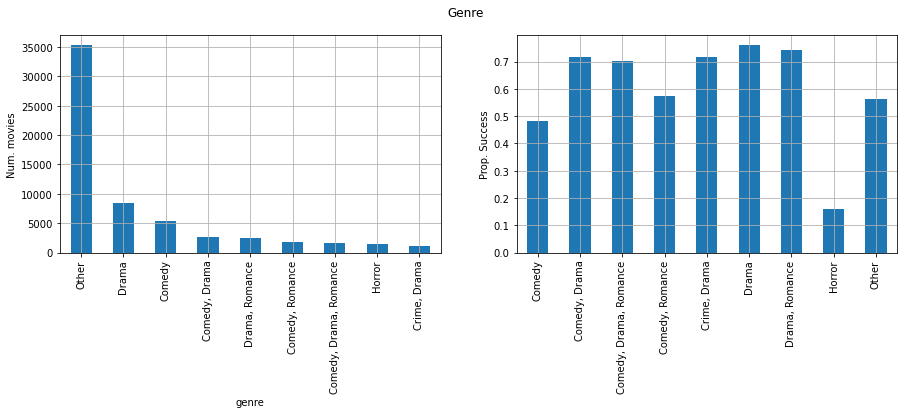

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,4))
fig.suptitle('Genre')
genre_total = full_dataset[full_dataset['success'] == 1].genre.value_counts().sort_index(ascending = False)
plt.sca(ax1) 
full_dataset.groupby(['genre']).count()['success'].sort_values(ascending = False).plot(kind = 'bar', grid = True);
ax1.set_ylabel('Num. movies')
plt.sca(ax2) 
(genre_total/full_dataset.groupby(['genre']).count()['success']).sort_index().plot(kind = 'bar', grid = True);
ax2.set_ylabel('Prop. Success')

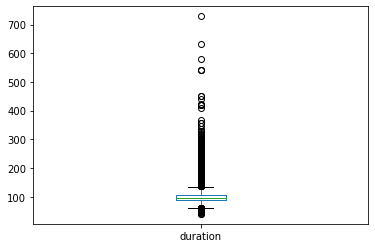

In [22]:
full_dataset['duration'].plot(kind = 'box')

In [23]:
full_dataset['duration'].median()

95.0

We can split duration into several groups. For each group create a binary variable duration_size1, duration_size2 and duration_size3. For movies with duration more than 300, they belong to duration_size1. For movies with duration between 300 and 120, they belong to duration_size2. For movies with duration between 120 and 60, they belong to duration_size3. For movies with duration less than 60, they belong to duration_size4.

In [24]:
full_dataset['duration_size1'] = np.where(full_dataset['duration'] > 300, 1, 0)
full_dataset['duration_size2'] = np.where((full_dataset['duration'] <= 300) & (full_dataset['duration'] > 120), 1, 0)
full_dataset['duration_size3'] = np.where((full_dataset['duration'] <= 120)&(full_dataset['duration'] > 60), 1, 0 )
full_dataset['duration_size4'] = np.where(full_dataset['duration'] <= 60, 1, 0)

In [25]:
full_dataset.drop(columns = ['duration'], inplace = True)

In [26]:
y = full_dataset["success"]
X = full_dataset.drop("success", axis=1)

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=1)

Note that budget, usa_gross_income and worlwide_gross_income are actually numerical values. We need to get rid of the $ sign.

In [27]:
X_tr['usa_gross_income'] = X_tr['usa_gross_income'].str.replace('$', '')
X_tr['usa_gross_income'] = pd.to_numeric(X_tr['usa_gross_income'], errors='coerce')

X_te['usa_gross_income'] = X_te['usa_gross_income'].str.replace('$', '')
X_te['usa_gross_income'] = pd.to_numeric(X_te['usa_gross_income'], errors='coerce')

In [28]:
X_tr['worlwide_gross_income'] = X_tr['worlwide_gross_income'].str.replace('$','')
X_tr['worlwide_gross_income'] = pd.to_numeric(X_tr['worlwide_gross_income'], errors = 'coerce')

X_te['worlwide_gross_income'] = X_te['worlwide_gross_income'].str.replace('$','')
X_te['worlwide_gross_income'] = pd.to_numeric(X_te['worlwide_gross_income'], errors = 'coerce')

In [29]:
X_tr['budget'] = X_tr['budget'].str.replace('$','')
X_tr['budget'] = pd.to_numeric(X_tr['budget'], errors = 'coerce')

X_te['budget'] = X_te['budget'].str.replace('$','')
X_te['budget'] = pd.to_numeric(X_te['budget'], errors = 'coerce')

Since we already have index column, we can get rid of imdb_title_id as it serves as the index column for the movies.

In [30]:
X_tr.drop(columns = ['imdb_title_id'], inplace = True)
X_te.drop(columns = ['imdb_title_id'], inplace = True)

Consider column Year and Date of publish. We can keep year column because these variables are basically have the same information year.

In [31]:
X_tr.drop(columns = ['date_published'], inplace = True)
X_te.drop(columns = ['date_published'], inplace = True)

2.2 Explore you data: make plots, print tables. Make sure to write your observations.  Do not forget to fill-in missing values, define relevant columns transformatios. 


# Explore numerical variables

In [32]:
num_cols = X_tr.columns[np.logical_or(X_tr.dtypes == "int64", X_tr.dtypes == "float64")].tolist() #
num_cols

['year',
 'votes',
 'budget',
 'usa_gross_income',
 'worlwide_gross_income',
 'metascore',
 'reviews_from_users',
 'reviews_from_critics',
 'duration_size1',
 'duration_size2',
 'duration_size3',
 'duration_size4']

In [33]:
num_cols = [item for item in num_cols if item != 'duration_size1' and item != 'duration_size2' and item != 'duration_size3' and item != 'duration_size4']


In [34]:
num_cols

['year',
 'votes',
 'budget',
 'usa_gross_income',
 'worlwide_gross_income',
 'metascore',
 'reviews_from_users',
 'reviews_from_critics']

Distribution of numerical features:


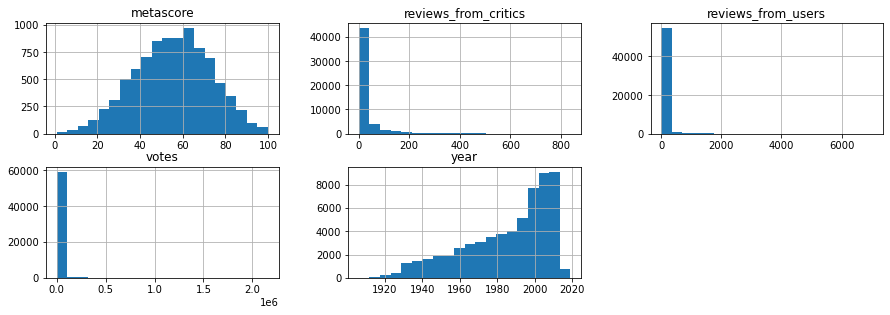

In [35]:
print("Distribution of numerical features:")
X[num_cols].hist(bins=20, grid=True, figsize=(15, 10), layout=(4, 3))
plt.show()

Note that metascore is normally distributed. 

In [36]:
print("Number of missing values in each column:\n")
X[num_cols].isnull().sum()

Number of missing values in each column:



year                         0
votes                        0
budget                   43379
usa_gross_income         48306
worlwide_gross_income    41062
metascore                51386
reviews_from_users        4069
reviews_from_critics      8229
dtype: int64

# Explore categorical variable

In [37]:
cat_cols = X_tr.columns[X_tr.dtypes == "object"].tolist() #
print("Number of categorical features =", len(cat_cols), "\n")

Number of categorical features = 10 



In [38]:
X[cat_cols].isnull().sum()

title                    0
original_title           0
genre                    0
country                  5
language               439
director                24
writer                 808
production_company    2744
actors                  30
description           1993
dtype: int64

In [39]:
X_tr[cat_cols].describe(include='object')

,title,original_title,genre,country,language,director,writer,production_company,actors,description
count,42138,42138,42138,42134,41837,42123,41582,40180,42119,40725
unique,40591,40596,9,2580,2459,18261,34652,16607,42111,40685
top,Hamlet,Hamlet,Other,USA,English,Michael Curtiz,Jing Wong,Metro-Goldwyn-Mayer (MGM),"Nobuyo Ôyama, Noriko Ohara, Michiko Nomura, Ka...",Mail
freq,7,7,24576,15430,18839,64,49,904,5,6


Remove categorical variables that have more than $10000$ unique variables.

In [40]:
remove_cols = ['title', 'original_title', 'writer', 'actors', 'description', 'director', 'production_company']

X_tr.drop(columns = remove_cols, inplace = True)
X_te.drop(columns = remove_cols, inplace = True)

cat_cols = [item for item in cat_cols if item not in remove_cols]

In [41]:
cat_cols

['genre', 'country', 'language']

We can explore the rest of categorical variables, genre, country, language.

In [42]:
X_tr[cat_cols].isnull().sum()

genre         0
country       4
language    301
dtype: int64

Distribution of categorical features:


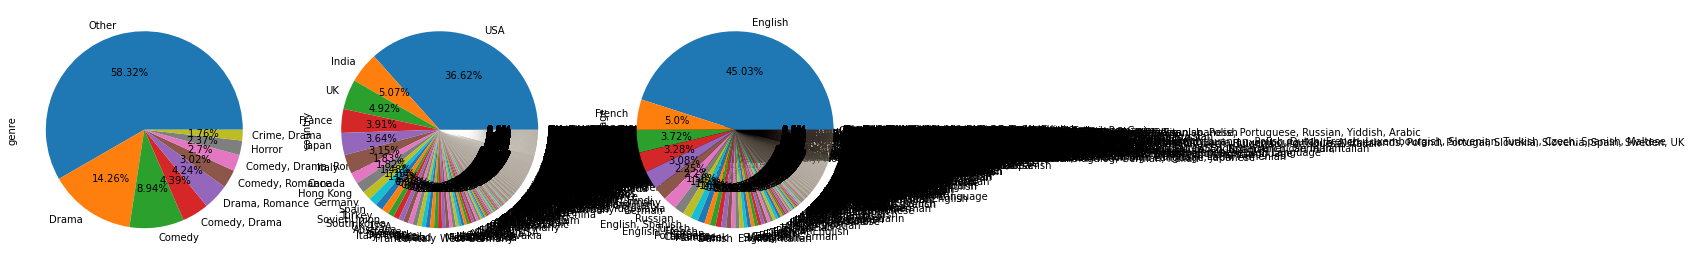

In [43]:
cat_cols_plot = ['genre', 'country', 'language']

print("Distribution of categorical features:")
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols_plot):
    plt.subplot(1, 3, i + 1)
    X_tr[col].value_counts(normalize=True).plot.pie(autopct=lambda x: f"{round(x, 2)}%")
plt.show()

# Column Transformer

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [45]:
num_pipe = make_pipeline(SimpleImputer(), StandardScaler())
cat_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown = 'ignore'))

column_transformer = ColumnTransformer([
 ('num', num_pipe, num_cols),
 ('cat', cat_pipe, cat_cols)],
remainder='passthrough'
)

### Part 3.

Train and compare the models

3.1. Select models, you are going to train, select hyperparameters that have to be tunes.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Model1: Logistic Regression

In [47]:
# your code here
log_pipe = Pipeline(steps = [
    ("col_transformer", column_transformer),
    ("estimator", LogisticRegression(penalty = 'none'))
])

In [48]:
log_pipe['estimator'].get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [49]:
param_grid = {
    'estimator__C': [1,10,100,1000],
}

grid_pipe = GridSearchCV(log_pipe,param_grid = param_grid, cv = 5, scoring = "f1")
grid_pipe.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('col_transformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                    

In [50]:
grid_pipe.best_estimator_

Pipeline(memory=None,
         steps=[('col_transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                               

In [51]:
grid_pipe.best_score_

0.7919295386479401

# Model 2: Decision Tree

In [52]:
tree_pipe = Pipeline(steps = [
    ("col_transformer", column_transformer),
    ("estimator", DecisionTreeClassifier())
])

In [53]:
tree_pipe['estimator'].get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [54]:
param_grid = {
    'estimator__max_depth': [2,6,8],
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__min_samples_split': [10, 20, 40],
}

grid_tree_pipe = GridSearchCV(tree_pipe,param_grid = param_grid, cv = 5, scoring = 'f1')
grid_tree_pipe.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('col_transformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                    

In [55]:
grid_tree_pipe.best_score_

0.786934270919837

In [56]:
grid_tree_pipe.best_estimator_

Pipeline(memory=None,
         steps=[('col_transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                               

# Model 3: Gradient Boosting

In [57]:
boost_pipe = Pipeline(steps = [
    ("col_transformer", column_transformer),
    ("estimator", GradientBoostingClassifier())
])

In [58]:
boost_pipe['estimator'].get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [59]:
params_grid = {
    'estimator__max_depth': [2,6,8],
    'estimator__learning_rate': [0.01],
}

grid_boost_pipe = GridSearchCV(boost_pipe, param_grid = params_grid, cv = 5, scoring = 'f1')
grid_boost_pipe.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('col_transformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                    

In [60]:
grid_boost_pipe.best_score_

0.8112274966278041

In [61]:
grid_boost_pipe.best_estimator_

Pipeline(memory=None,
         steps=[('col_transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                               

3.2 Use cross-validation to compare models and select best set of hyperparameters

Gradient Boosting model performs best. 

3.3 Which model and setup is the best? How does it perform on the test dataset? If you were to present this model to the client, how would you describe it?

In [65]:
from sklearn.metrics import f1_score

grid_boost_pipe.best_estimator_.fit(X_tr, y_tr)
y_pred = grid_boost_pipe.best_estimator_.predict(X_te)
f1_score(y_te, y_pred)

0.811528608027327